In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("scoreboard.csv", index_col=False)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,35,41,46,52,54,80,88,134,143,152,161,170,170,170,170,170,170
1,30,34,61,62,79,88,99,108,122,136,152,161,170,170,170,170,170
2,32,34,37,37,65,109,118,127,152,161,170,170,170,170,170,170,170
3,35,37,57,62,64,73,80,80,97,111,152,161,170,170,170,170,170
4,30,47,54,58,92,101,118,161,170,170,170,170,170,170,170,170,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,32,41,78,81,104,113,118,125,131,145,161,170,170,170,170,170,170
229,35,35,37,80,89,89,106,108,122,161,170,170,170,170,170,170,170
230,32,41,47,58,58,72,76,85,127,129,161,170,170,170,170,170,170
231,30,35,39,57,93,102,104,106,113,127,136,145,170,170,170,170,170


In [25]:
data = data.iloc[:, :6]  # Keep only the first 6 columns (0 to 5)

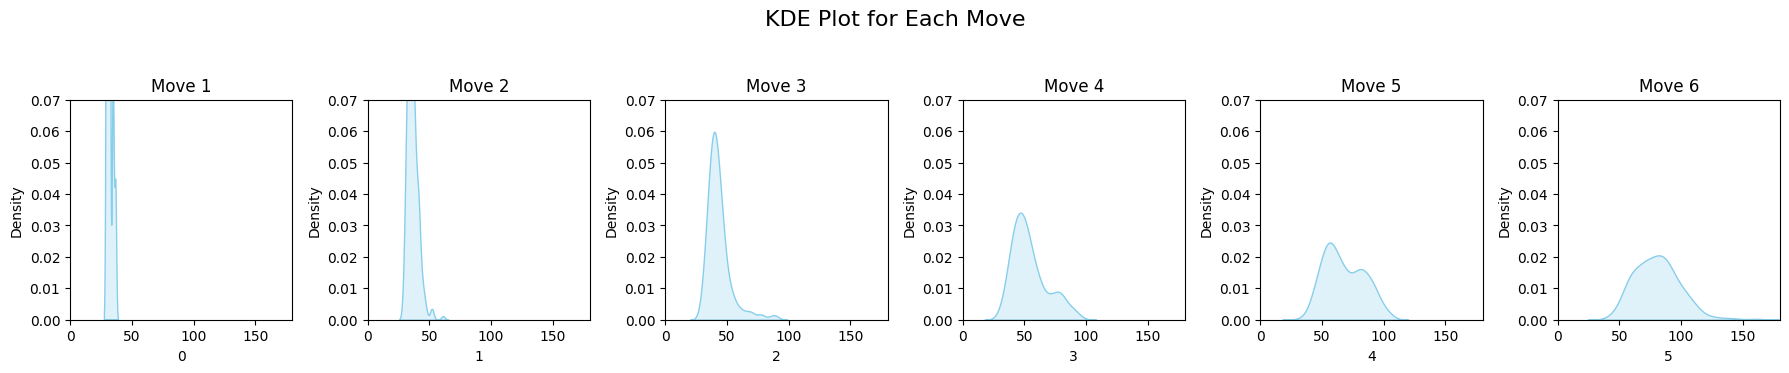

In [26]:
# Create a DataFrame where each column is a move
df = pd.DataFrame(data).T  # Transpose so each row = move

# Plotting
fig, axes = plt.subplots(3, 6, figsize=(18, 9))
axes = axes.flatten()

for i in range(df.shape[0]):
    sns.kdeplot(df.iloc[i].dropna(), ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f"Move {i+1}")
    axes[i].set_xlim(0, 180)
    axes[i].set_ylim(0, 0.07)

# Remove extra subplots
for j in range(df.shape[0], len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("KDE Plot for Each Move", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

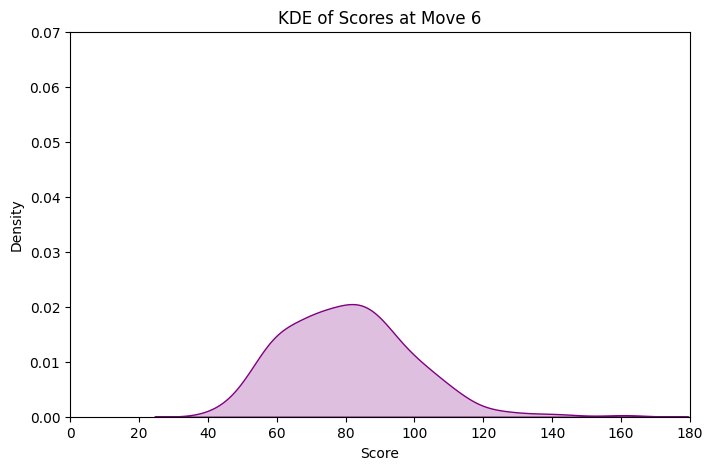

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))
data = data.T

def update(move_index):
    ax.clear()
    move_scores = data.iloc[move_index].dropna()
    sns.kdeplot(move_scores, fill=True, color='purple', ax=ax)
    ax.set_xlim(0, 180)
    ax.set_ylim(0, 0.07)
    ax.set_title(f"KDE of Scores at Move {move_index + 1}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Density")

# Create animation
from matplotlib.animation import FuncAnimation
ani = FuncAnimation(fig, update, frames=len(data), interval=800, repeat=True)

# To save the animation as a .gif or .mp4:
ani.save('score_distribution.gif', writer='pillow')
# ani.save('score_distribution.mp4', writer='ffmpeg')

plt.show()